In [1]:
import numpy as np
import os
import random as rd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten,Conv2D,MaxPooling2D
import tensorflow as tf
import pickle

In [2]:
DATADIR = r"C:\Users\LENOVO IDEAPAD\Downloads\kagglecatsanddogs_3367a\PetImages"
CATEGORIES = ["Dog","Cat"]



In [3]:
#this will just plt all the photos in the given dir
#a = os.path.join(DATADIR,'Dog')
#b=os.listdir(a)
#for i in os.listdir(a): 
 #   img = cv2.imread(os.path.join(a,i),cv2.IMREAD_GRAYSCALE)
  #  plt.imshow(img,cmap="gray")
   # plt.show()


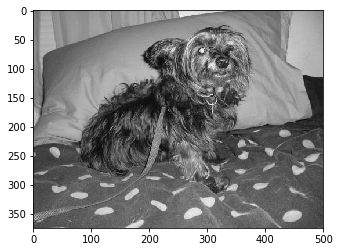

In [4]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category) #this will take us to the path of dataset
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [5]:
#img_array.shape
#z = os.path.join(DATADIR,"Cat")
#len(os.listdir(z))

In [6]:
img_array

array([[117, 117, 119, ..., 133, 132, 132],
       [118, 117, 119, ..., 135, 134, 134],
       [119, 118, 120, ..., 137, 136, 136],
       ...,
       [ 79,  74,  73, ...,  80,  76,  73],
       [ 78,  72,  69, ...,  72,  73,  74],
       [ 74,  71,  70, ...,  75,  73,  71]], dtype=uint8)

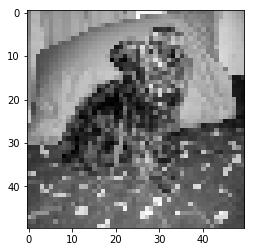

In [7]:
img_size = 50

new_arr = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_arr,cmap = "gray")
plt.show()

In [8]:
training_data = []


def create_training_data():
    i=0
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) #this will take us to the path of dataset
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            if i%100 ==0:
                print("progress : ",i)
            i=i+1
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_arr = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_arr,class_num])  
            except Exception as e:
                pass
            
            
            
            

In [9]:
create_training_data()

progress :  0
progress :  100
progress :  200
progress :  300
progress :  400
progress :  500
progress :  600
progress :  700
progress :  800
progress :  900
progress :  1000
progress :  1100
progress :  1200
progress :  1300
progress :  1400
progress :  1500
progress :  1600
progress :  1700
progress :  1800
progress :  1900
progress :  2000
progress :  2100
progress :  2200
progress :  2300
progress :  2400
progress :  2500
progress :  2600
progress :  2700
progress :  2800
progress :  2900
progress :  3000
progress :  3100
progress :  3200
progress :  3300
progress :  3400
progress :  3500
progress :  3600
progress :  3700
progress :  3800
progress :  3900
progress :  4000
progress :  4100
progress :  4200
progress :  4300
progress :  4400
progress :  4500
progress :  4600
progress :  4700
progress :  4800
progress :  4900
progress :  5000
progress :  5100
progress :  5200
progress :  5300
progress :  5400
progress :  5500
progress :  5600
progress :  5700
progress :  5800
progress 

In [10]:
len(training_data)

24946

In [11]:
training_data

[[array([[115, 160, 159, ..., 157, 148, 139],
         [121, 164, 166, ..., 163, 153, 146],
         [124, 161, 164, ..., 168, 161, 151],
         ...,
         [155, 128,  88, ...,  81,  69,  68],
         [ 87,  95,  72, ...,  77,  74,  73],
         [ 75,  78,  79, ...,  75,  78,  75]], dtype=uint8), 0],
 [array([[116, 125,  75, ...,  88,  81,  61],
         [ 83, 126,  82, ...,  93,  69,  58],
         [106, 117,  99, ...,  27,  88,  68],
         ...,
         [245, 243, 249, ..., 231, 224, 216],
         [249, 246, 249, ..., 238, 227, 227],
         [240, 239, 243, ..., 243, 234, 234]], dtype=uint8), 0],
 [array([[112, 102, 116, ..., 123, 122, 123],
         [ 88, 110, 120, ..., 123, 121, 119],
         [138, 140, 126, ..., 124, 124, 125],
         ...,
         [203, 208, 206, ...,  98,  96,  94],
         [201, 199, 197, ...,  92,  95,  96],
         [201, 199, 198, ...,  93,  96,  95]], dtype=uint8), 0],
 [array([[188, 184, 181, ...,  35,  32,  38],
         [181, 184, 183, ..

In [12]:
rd.shuffle(training_data)

76


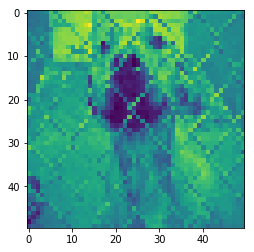

0

In [13]:


f = int(input())

rndm_img = training_data[f][0]
plt.imshow(rndm_img)  
plt.show()
training_data[f][1]




In [14]:
X = pickle.load(open("X.pickle","rb"))
Y = pickle.load(open("Y.pickle","rb"))

In [15]:
X = []
Y = []

for features, labels in training_data:
    X.append(features)
    Y.append(labels)


In [16]:


X = np.array(X).reshape(-1,img_size,img_size,1)


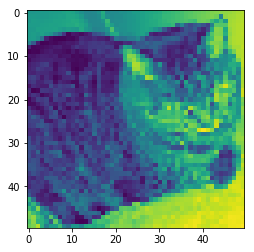

In [17]:
plt.imshow(X[1].reshape(50,50))

In [18]:
X[1].shape

(50, 50, 1)

In [19]:
X.shape

(24946, 50, 50, 1)

In [20]:
type(X)

numpy.ndarray

In [21]:
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()